In [1]:
import pandas as pd

oct_df = pd.read_csv('2019-Oct.csv')
print(f"October loaded with {len(oct_df):,} rows")

nov_df = pd.read_csv('2019-Nov.csv')
print(f"November loaded with {len(nov_df):,} rows")

df = pd.concat([oct_df, nov_df], ignore_index=True)
print(f"Combined data: {len(df):,} rows")

October loaded with 42,448,764 rows
November loaded with 67,501,979 rows
Combined data: 109,950,743 rows


Total purchases: 1,659,788

Sample daily revenue:
event_time
2019-10-01    6275964.01
2019-10-02    6213628.53
2019-10-03    6233782.98
2019-10-04    8623684.47
2019-10-05    7341596.91
Name: price, dtype: float64


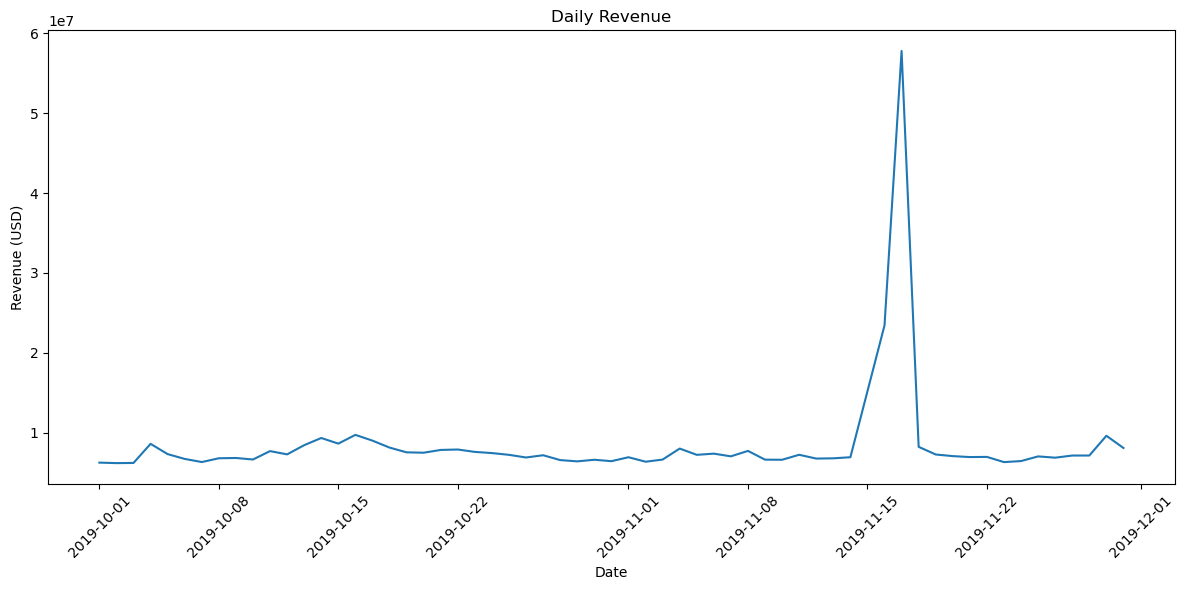


Top 10 categories by revenue:
category_code
electronics.smartphone              3.348713e+08
electronics.video.tv                2.088056e+07
computers.notebook                  1.965832e+07
electronics.clocks                  1.137104e+07
appliances.kitchen.washer           1.046055e+07
electronics.audio.headphone         9.208629e+06
appliances.kitchen.refrigerators    8.552734e+06
appliances.environment.vacuum       4.478737e+06
electronics.tablet                  3.131227e+06
computers.desktop                   2.673460e+06
Name: price, dtype: float64


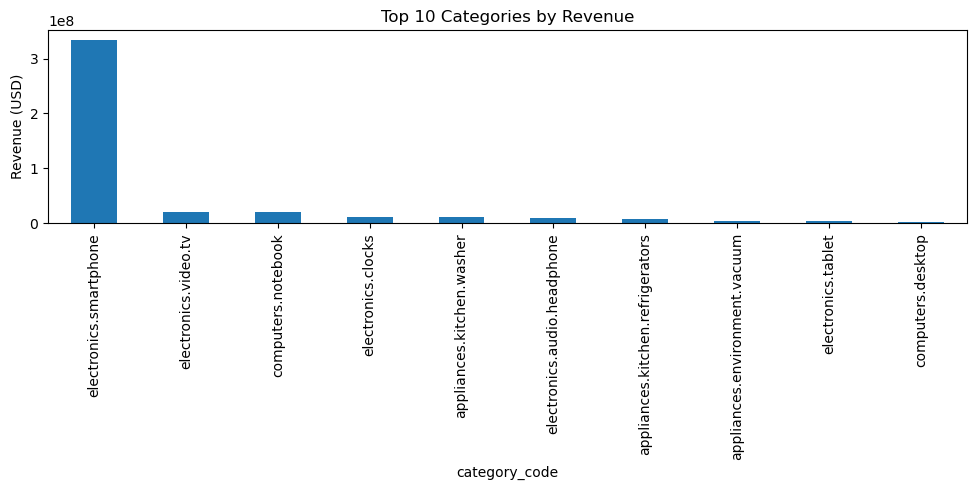

In [3]:
import matplotlib.pyplot as plt

# Convert datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Filter to purchases
purchases = df[df['event_type'] == 'purchase']
print(f"Total purchases: {len(purchases):,}")

# Total revenue by day
daily_revenue = purchases.groupby(purchases['event_time'].dt.date)['price'].sum()
print("\nSample daily revenue:")
print(daily_revenue.head())

# Plot revenue over time
plt.figure(figsize=(12,6))
daily_revenue.plot(kind='line', title='Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# If category_code exists, show top 10 revenue categories
if 'category_code' in purchases.columns:
    top_categories = purchases.groupby('category_code')['price'].sum().sort_values(ascending=False)
    print("\nTop 10 categories by revenue:")
    print(top_categories.head(10))
    
    top_categories.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Categories by Revenue')
    plt.ylabel('Revenue (USD)')
    plt.tight_layout()
    plt.show()

In [7]:
df.to_csv('cleaned_data.csv', index=False)
print("Saved combined dataset as cleaned_data.csv")


Saved combined dataset as cleaned_data.csv
